**Global Trends in CO2 Emissions and Their Impact on Air Quality**


by Rishabh Parakh



**Project Objective**

To identify the primary sectoral sources of CO2 in the top emitting countries and examine whether there is a direct correlation between these emissions and corresponding air quality measures.

**DATA OVERVIEW:**

DATASET1(CO2 and Greenhouse Gas Emissions Dataset:)

Data source: Data is sourced from the [Global Carbon Project](http://www.globalcarbonproject.org/carbonbudget)

Year: 1750-2020

Number of Observations: 25,204

DATASET2(Global Air Pollution Dataset:)

Data source: Data is collected from https://www.elichens.com/

Year: 2020

Number of Observations: 23,463

D1: DATA IMPORT

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rishabhparakh03","key":"4b49c39e5550d04c2e28ab6ede62ba2f"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                       title                                   size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                           DAIGT V2 Train Dataset                  29MB  2023-11-16 01:38:36           1283        140  1.0              
muhammadbinimran/housing-price-prediction-data            Housing Price Prediction Data          763KB  2023-11-21 17:56:32           5175         95  1.0              
thedevastator/netflix-imdb-scores                         Netflix IMDB Scores                    699KB  2023-12-03 14:10:34           1233         24  1.0              
youssefaboelwafa/hotel-booking-cancellation-prediction    Hotel Booking Cancellation Prediction  470KB  2023-12-03 01:54:35            804         24  1.0 

In [ ]:
!kaggle datasets download -d hasibalmuzdadid/global-air-pollution-dataset

  0% 0.00/371k [00:00<?, ?B/s]
100% 371k/371k [00:00<00:00, 135MB/s]


In [ ]:
!unzip global-air-pollution-dataset.zip

Archive:  global-air-pollution-dataset.zip
  inflating: global air pollution dataset.csv  


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("global air pollution dataset.csv")

In [ ]:
!kaggle datasets download -d danielrpdias/co2-and-greenhouse-gas-emissions

  0% 0.00/1.74M [00:00<?, ?B/s]
100% 1.74M/1.74M [00:00<00:00, 183MB/s]


In [ ]:
!unzip co2-and-greenhouse-gas-emissions.zip

Archive:  co2-and-greenhouse-gas-emissions.zip
  inflating: owid-co2-data.csv       


In [ ]:
df1=pd.read_csv("owid-co2-data.csv")

D2: DATA-PREPROCESSING


In [ ]:
# Fill missing values in numerical columns with the median
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
df1[numerical_cols] = df1[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = df1.select_dtypes(include=['object']).columns
df1[categorical_cols] = df1[categorical_cols].fillna('Unknown')


In [ ]:
# Renaming columns with unclear names or long spaces
renamed_columns = {
    'co2': 'CO2_Emissions',
    'consumption_co2': 'CO2_Consumption',
    'co2_per_capita': 'CO2_Emissions_Per_Capita',
    'trade_co2': 'CO2_Trade'
    # Add more as needed
}
data_renamed = df1.rename(columns=renamed_columns)


In [ ]:
# Capping outliers in 'CO2_Emissions' at the 1st and 99th percentiles
q_low = data_renamed['CO2_Emissions'].quantile(0.01)
q_high = data_renamed['CO2_Emissions'].quantile(0.99)
data_renamed['CO2_Emissions'] = data_renamed['CO2_Emissions'].clip(lower=q_low, upper=q_high)


In [ ]:
# Formatting 'gdp' with thousand separators
data_renamed['gdp'] = data_renamed['gdp'].apply(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

# Displaying the results
data_cleaned = data_renamed
print(data_cleaned.head())
print(data_cleaned.dtypes)


  iso_code      country  year  CO2_Emissions  CO2_Consumption  \
0      AFG  Afghanistan  1949          0.015           57.091   
1      AFG  Afghanistan  1950          0.084           57.091   
2      AFG  Afghanistan  1951          0.092           57.091   
3      AFG  Afghanistan  1952          0.092           57.091   
4      AFG  Afghanistan  1953          0.106           57.091   

   co2_growth_prct  co2_growth_abs  CO2_Trade  CO2_Emissions_Per_Capita  \
0             3.35           0.059      1.953                     0.002   
1           475.00           0.070      1.953                     0.011   
2             8.70           0.007      1.953                     0.012   
3             0.00           0.000      1.953                     0.012   
4            16.00           0.015      1.953                     0.013   

   consumption_co2_per_capita  ...  ghg_per_capita  methane  \
0                      4.3595  ...           5.474     9.03   
1                      4.3595  .

In [ ]:
# Fill missing values in numerical columns with the median
numerical_cols_air = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols_air] = df[numerical_cols_air].apply(lambda x: x.fillna(x.median()))

# Fill missing values in categorical columns with 'Unknown'
categorical_cols_air = df.select_dtypes(include=['object']).columns
df[categorical_cols_air] = df[categorical_cols_air].fillna('Unknown')

In [ ]:
print(df.head())
print(df.dtypes)

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good     

In [ ]:
# Counting the total number of missing values in the dataset
total_missing_values = df.isnull().sum().sum()

# Outputting the result
total_missing_values_output = f"Total Missing Values in the Dataset: {total_missing_values}"
print(total_missing_values_output)

Total Missing Values in the Dataset: 0


In [ ]:

data_cleaned.head(5)

,iso_code,country,year,CO2_Emissions,CO2_Consumption,co2_growth_prct,co2_growth_abs,CO2_Trade,CO2_Emissions_Per_Capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,57.091,3.35,0.059,1.953,0.002,4.3595,...,5.474,9.03,1.111,3.59,0.384,7624058.0,"30,370,194,552",61.4045,13701.318,1.407
1,AFG,Afghanistan,1950,0.084,57.091,475.00,0.070,1.953,0.011,4.3595,...,5.474,9.03,1.111,3.59,0.384,7752117.0,"9,421,400,000",61.4045,13701.318,1.407
2,AFG,Afghanistan,1951,0.092,57.091,8.70,0.007,1.953,0.012,4.3595,...,5.474,9.03,1.111,3.59,0.384,7840151.0,"9,692,280,000",61.4045,13701.318,1.407
3,AFG,Afghanistan,1952,0.092,57.091,0.00,0.000,1.953,0.012,4.3595,...,5.474,9.03,1.111,3.59,0.384,7935996.0,"10,017,325,000",61.4045,13701.318,1.407
4,AFG,Afghanistan,1953,0.106,57.091,16.00,0.015,1.953,0.013,4.3595,...,5.474,9.03,1.111,3.59,0.384,8039684.0,"10,630,520,000",61.4045,13701.318,1.407


In [ ]:
data_cleaned.columns

Index(['iso_code', 'country', 'year', 'CO2_Emissions', 'CO2_Consumption',
       'co2_growth_prct', 'co2_growth_abs', 'CO2_Trade',
       'CO2_Emissions_Per_Capita', 'consumption_co2_per_capita',
       'share_global_co2', 'cumulative_co2', 'share_global_cumulative_co2',
       'co2_per_gdp', 'consumption_co2_per_gdp', 'co2_per_unit_energy',
       'coal_co2', 'cement_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'other_industry_co2', 'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'other_co2_per_capita', 'trade_co2_share', 'share_global_cement_co2',
       'share_global_coal_co2', 'share_global_flaring_co2',
       'share_global_gas_co2', 'share_global_oil_co2',
       'share_global_other_co2', 'cumulative_cement_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2',
       'share_global_cumulative_cement_co2',
      

In [ ]:
df.head(5)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

D3: DATA ANALYSIS

Q1:What is the global distribution of CO2 emissions, and can we visualize it on a world map?

In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px


# Grouping by country and calculated total CO2 emissions in Dataset 1
total_co2_by_country = data_cleaned.groupby('iso_code')['CO2_Emissions'].sum().reset_index()

# Merging datasets to get country names

merged_data = pd.merge(total_co2_by_country, df, left_on='iso_code', right_on='Country', how='left')

# Creating a world map
fig = px.choropleth(merged_data,
                    locations='iso_code',
                    color='CO2_Emissions',
                    hover_name='Country',
                    title='Global CO2 Emissions by Country',
                    color_continuous_scale='Viridis')

# Showing the map
fig.show()


Q2:How does a country's GDP relate to its CO2 emissions? Is there a correlation?

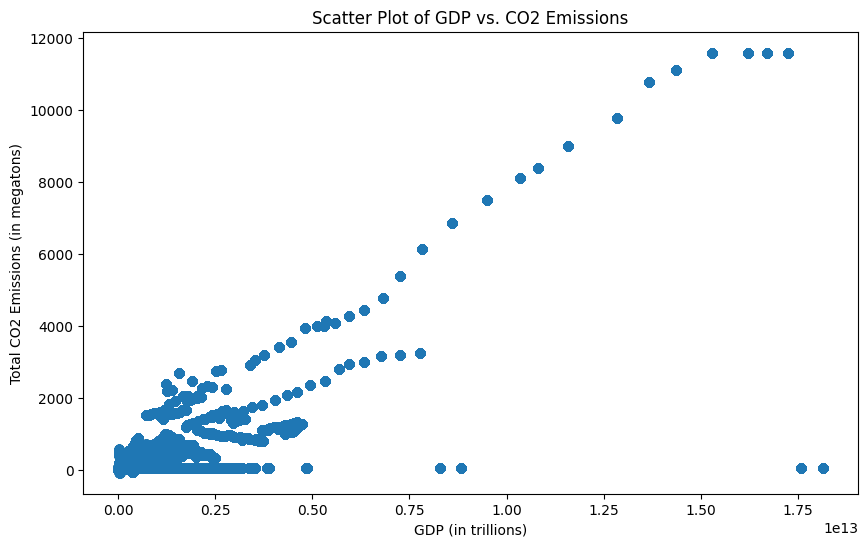

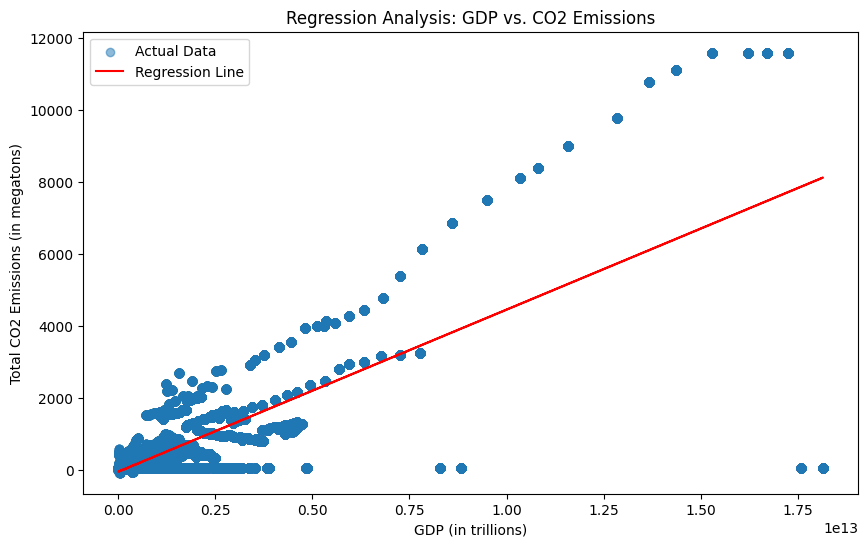

Regression Coefficients: [4.504616e-10]
Intercept: -55.8318874829705


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


merged_data = pd.merge(data_cleaned, df, left_on='country', right_on='Country', how='inner')

# Extracting relevant columns
gdp_co2_data = merged_data[['country', 'gdp', 'total_ghg']]

# Dropping rows with missing values
gdp_co2_data = gdp_co2_data.dropna()

# Removing commas from the 'gdp' column
gdp_co2_data['gdp'] = gdp_co2_data['gdp'].str.replace(',', '').astype(float)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gdp_co2_data['gdp'], gdp_co2_data['total_ghg'], alpha=0.5)
plt.title('Scatter Plot of GDP vs. CO2 Emissions')
plt.xlabel('GDP (in trillions)')
plt.ylabel('Total CO2 Emissions (in megatons)')
plt.show()

# Regression analysis
X = gdp_co2_data[['gdp']]
y = gdp_co2_data['total_ghg']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Regression Analysis: GDP vs. CO2 Emissions')
plt.xlabel('GDP (in trillions)')
plt.ylabel('Total CO2 Emissions (in megatons)')
plt.legend()
plt.show()

# Printing the regression coefficients
print('Regression Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Q3: Which sectors contribute the most to CO2 emissions globally?

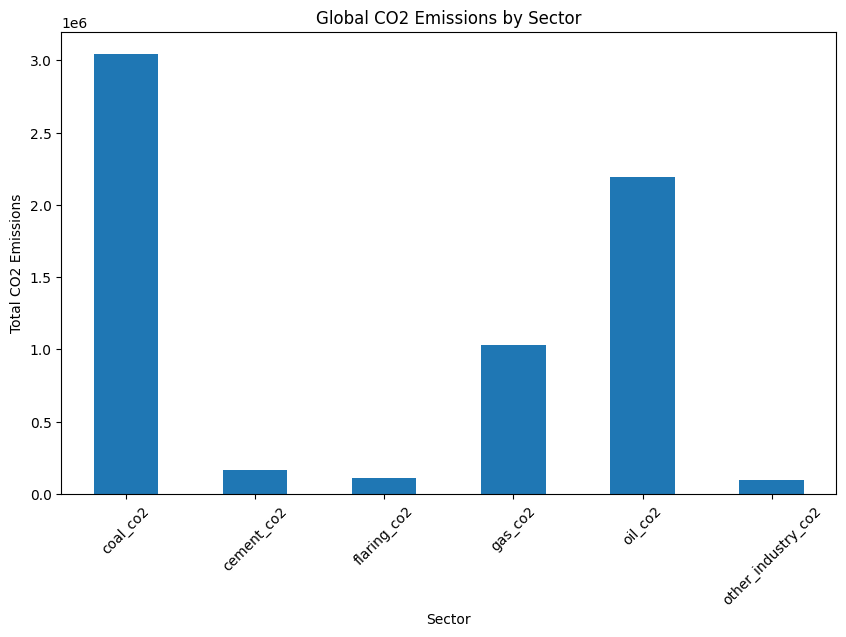

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Summing up the emissions from specified sectors across all countries
sectors = ['coal_co2', 'cement_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2']
total_emissions_by_sector = data_cleaned[sectors].sum()

# Plotting the results
plt.figure(figsize=(10, 6))
total_emissions_by_sector.plot(kind='bar')
plt.title('Global CO2 Emissions by Sector')
plt.xlabel('Sector')
plt.ylabel('Total CO2 Emissions')
plt.xticks(rotation=45)
plt.show()


Q4:How much does every sector contribute to the CO2 emission(top 20 countries)?

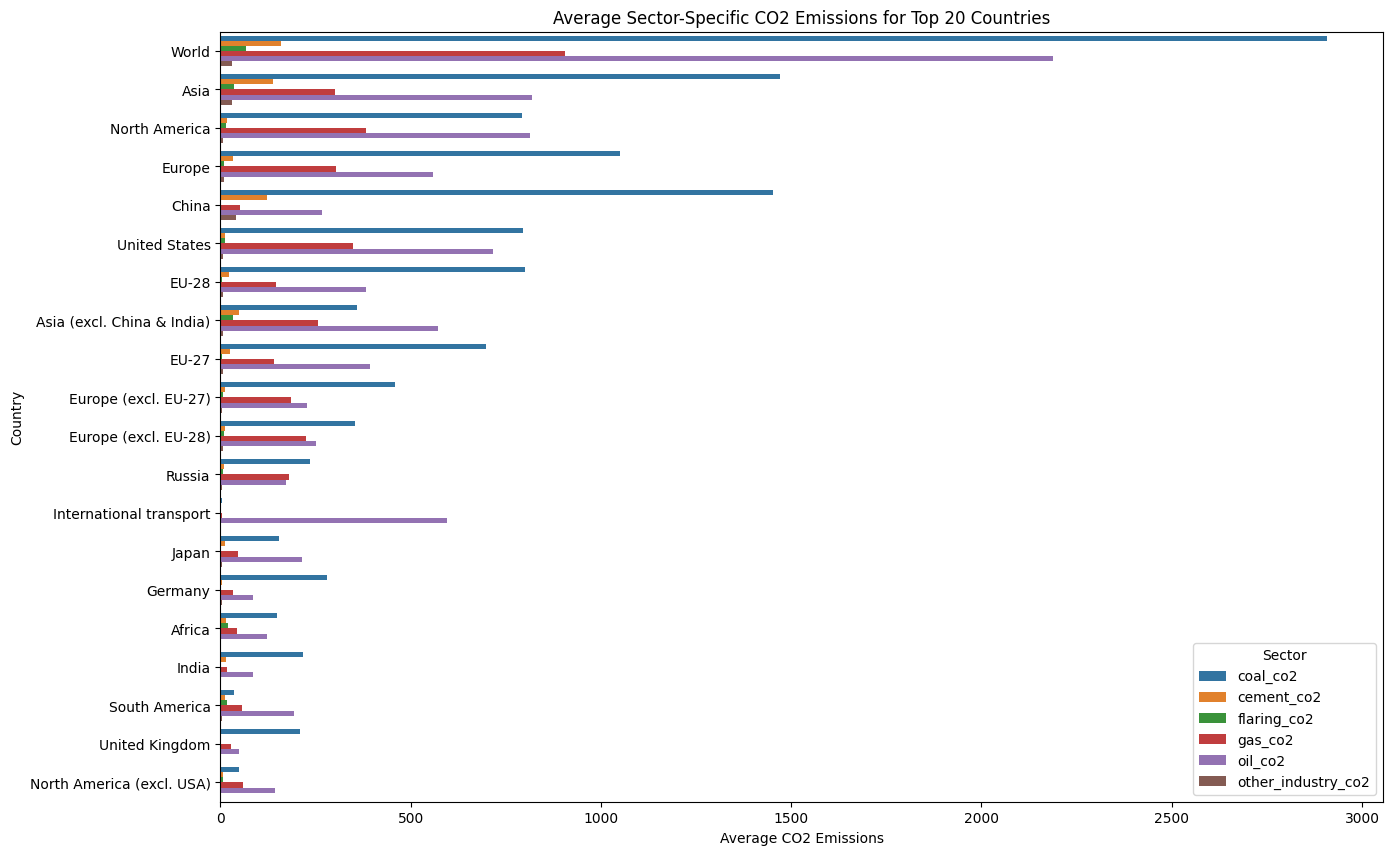

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Specifying all the sectors to include
sectors = ['coal_co2', 'cement_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2']

# Grouping by country and calculating the average emissions from different sectors
sector_emissions_all_countries = data_cleaned.groupby('country')[sectors].mean()

# Plotting the results
plt.figure(figsize=(15, 10))

# Since there might be many countries, we'll plot the top 20 countries for clarity
top_countries = sector_emissions_all_countries.mean(axis=1).nlargest(20).index
sector_emissions_top_countries = sector_emissions_all_countries.loc[top_countries]

# Melting the DataFrame for easier plotting with seaborn
melted_data = sector_emissions_top_countries.reset_index().melt(id_vars='country', var_name='Sector', value_name='Emissions')

# Creating a bar plot
sns.barplot(x='Emissions', y='country', hue='Sector', data=melted_data)
plt.title('Average Sector-Specific CO2 Emissions for Top 20 Countries')
plt.xlabel('Average CO2 Emissions')
plt.ylabel('Country')
plt.legend(title='Sector')

plt.show()



Q5:What's the correlation between CO2 emissions and AQI(top 20 countries)?

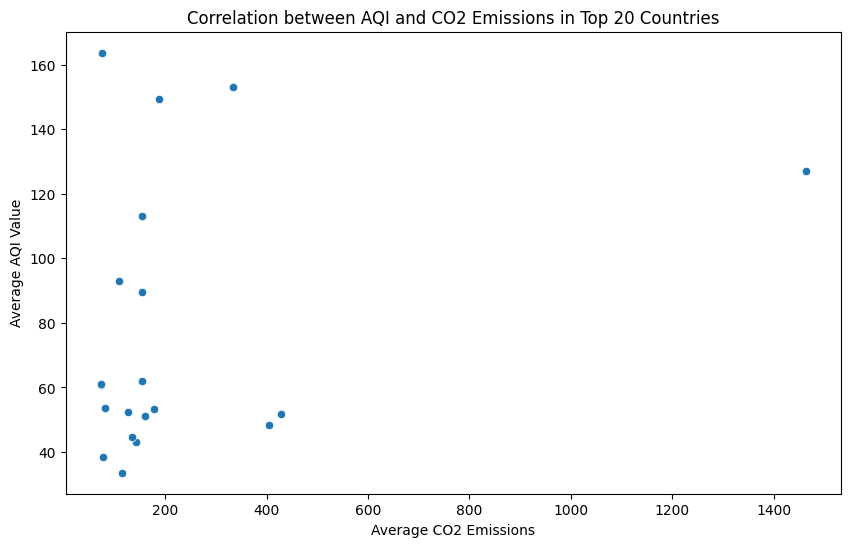

Correlation coefficient: 0.2856034687413324


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculating the average AQI for each country in the air pollution dataset (df)
average_aqi_per_country = df.groupby('Country')['AQI Value'].mean().reset_index()

# Calculating the average CO2 emissions for each country in the CO2 dataset (data_cleaned)
average_co2_per_country = data_cleaned.groupby('country')['CO2_Emissions'].mean().reset_index()

# Merging the average AQI and CO2 emissions data
merged_data = pd.merge(average_aqi_per_country, average_co2_per_country, left_on='Country', right_on='country')

# Selecting the top 20 countries based on CO2 emissions for clarity in visualization
top_20_co2_countries = merged_data.nlargest(20, 'CO2_Emissions')

# Plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_20_co2_countries, x='CO2_Emissions', y='AQI Value')
plt.title('Correlation between AQI and CO2 Emissions in Top 20 Countries')
plt.xlabel('Average CO2 Emissions')
plt.ylabel('Average AQI Value')
plt.show()

# Computing correlation
correlation = top_20_co2_countries['CO2_Emissions'].corr(top_20_co2_countries['AQI Value'])
print("Correlation coefficient:", correlation)


Q6: which pollutant has the biggest impact on AQI ?

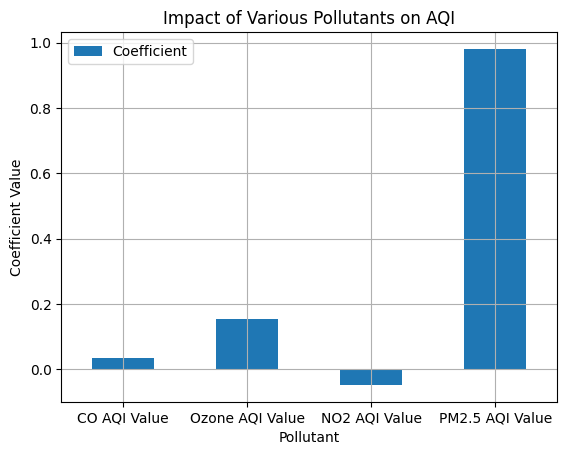

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Selecting the AQI values for different pollutants
X = df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]  # Independent variables
y = df['AQI Value']  # Dependent variable, the overall AQI

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Getting the coefficients from the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Plotting the coefficients for visualization
coefficients.plot(kind='bar')
plt.title('Impact of Various Pollutants on AQI')
plt.xlabel('Pollutant')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


D4:KEY FINDINGS

1.The global distribution of CO2 emissions is uneven, with certain countries significantly outpacing others in emissions with USA having the higgest CO2 emission.

2.Sector analysis revealed that coal and oil are the major contributors to global CO2 emissions.

3.The top 20 emitting countries show varied sector-specific contributions to CO2 emissions, suggesting differing industrial activities impact their total emissions.

4.A positive correlation exists between a country's GDP and its CO2 emissions, indicating that wealthier countries tend to emit more CO2.

5.The correlation between CO2 emissions and AQI in the top 20 countries is positive but weak, suggesting other factors also significantly influence AQI.

6.Among various pollutants, PM2.5 has the strongest positive impact on AQI, indicating it as a significant contributor to air quality degradation.


D5:SCOPE FOR FURTHER RESEARCH

1.Investigate other factors influencing CO2 emissions and AQI, such as energy consumption patterns, industrialization levels, and urbanization rates.

2.A comprehensive analysis considering more pollutants, including PM10, SO2, and NOx, could provide a more holistic view of factors affecting AQI.
